# Predicting Gold Price

### Import libraries

In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

import seaborn as sns
from sklearn.preprocessing import StandardScaler
matplotlib.rcParams["figure.figsize"] = (20,10)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import pickle
import json
print("Packages imported")


Packages imported


### Data loading and processing

In [2]:
# loadind data and reading first 5 rows from dataset
df=pd.read_csv("gld_price_data.csv")
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
# reading last 5 rows from dataset

df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# getting number of columns and rows
df.shape

(2290, 6)

In [7]:
# Getting basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# checking missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

##### This dataset does not have missing values

In [10]:
# column names of dataset
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [15]:
# find which columns have null values 
[features for features in df.columns if df[features ].isnull().sum()>0]

[]

In [11]:
# getting statistical measures of data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [16]:
#Checking correlation of features
correlation=df.corr(numeric_only=True)
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

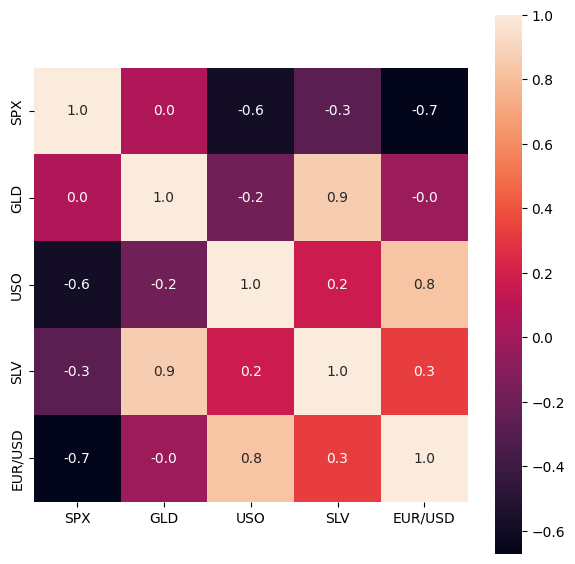

In [22]:
#plotting heatmap to understand correlation clearly
matplotlib.rcParams["figure.figsize"] = (7,7)
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True)

#### Silver price is positively correlated with Gold price and USO is negatively correlated with gold price

In [27]:
# Correlation values of Gold
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

<Axes: xlabel='GLD', ylabel='Density'>

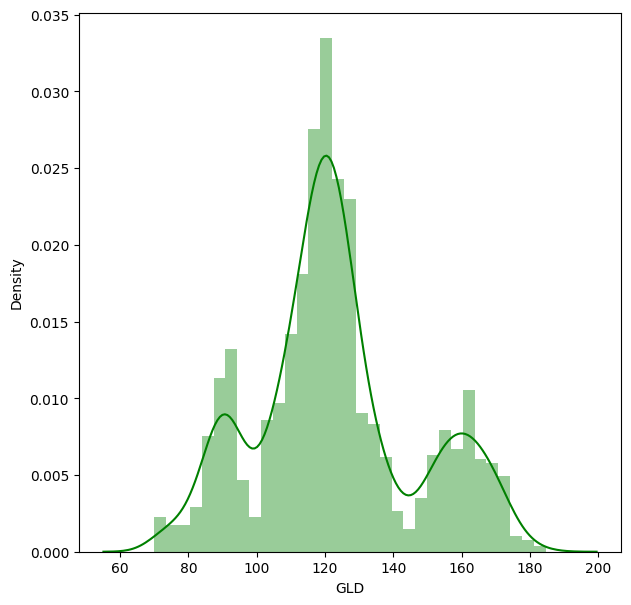

In [31]:
# Distribution of gold prices
sns.distplot(df['GLD'],color='green')

#### Minimum price is 70 and maximum price is 184 and mean value is 120.Density of 120 is more.So chances of getting gold price as 120 is high

### Model Building

In [37]:
# dropping date and gold columns to make X 
X=df.drop(['Date','GLD'],axis=1)
y=df['GLD']
X.shape

(2290, 4)

In [36]:
y.shape

(2290,)

#### Split the data into training and testing data using the train_test_split function

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [68]:
X_train

,SPX,USO,SLV,EUR/USD
476,1138.500000,39.790001,16.889999,1.361693
1958,2202.939941,10.630000,15.800000,1.063886
248,700.820007,24.480000,12.770000,1.256408
2231,2656.000000,11.890000,15.570000,1.225280
1325,1838.880005,33.040001,19.420000,1.366998
...,...,...,...,...
1071,1409.150024,32.320000,32.980000,1.287515
433,1132.989990,40.270000,17.230000,1.442398
674,1286.119995,38.610001,27.389999,1.357276
1099,1461.890015,33.919998,29.180000,1.306745


In [71]:
X_test.head(30)

,SPX,USO,SLV,EUR/USD
903,1351.949951,38.330002,32.900002,1.324854
129,1271.510010,93.900002,13.450000,1.472581
1787,1880.050049,8.910000,14.340000,1.119996
1913,2181.300049,10.960000,18.620001,1.127142
2048,2352.949951,10.680000,17.320000,1.067247
996,1353.640015,33.119999,26.490000,1.226843
769,1339.219971,37.889999,35.099998,1.433158
2134,2488.110107,9.820000,16.770000,1.195943
1485,1968.890015,33.000000,16.680000,1.274307
1441,1983.530029,37.950001,20.100000,1.346801


### Find best model using GridSearchCV

In [44]:
from sklearn.model_selection import ShuffleSplit

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators' : [100]
                
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.881436,{'fit_intercept': True}
1,lasso,0.880209,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.981009,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,random_forest,0.990623,{'n_estimators': 100}


#### Based on above results we can say that RandomForestRegressor gives the best score

In [53]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)


0.989188231655233

### Export the tested model to a pickle file

In [56]:
#import pickle
with open('gld_price_model.pickle','wb') as f:
    pickle.dump(rf,f)

### Export location and column information to a file

In [57]:
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

####  Load the model

In [58]:
with open('gld_price_model.pickle','rb') as f:
    mp=pickle.load(f)

### Predict the model with test data

In [59]:
mp.predict(X_test)

array([168.44759891,  82.01269971, 116.30590022, 127.71360093,
       120.69640143, 154.90499767, 150.61559987, 126.04480059,
       117.35609877, 125.98280058, 116.51280095, 172.30140089,
       141.08329899, 167.83869855, 115.18180029, 117.82880048,
       138.08690322, 170.24810123, 159.40100288, 159.23759985,
       155.17680034, 125.05709997, 177.40189998, 156.95350404,
       125.14640041,  93.90479987,  76.91410032, 120.40469992,
       119.17009953, 167.30850024,  88.049     , 125.32459984,
        91.01520092, 117.78529983, 121.04149926, 135.84890149,
       115.49920106, 115.29780058, 147.79680015, 107.09530104,
       104.08750234,  87.14409805, 126.45610045, 117.8410002 ,
       153.18549915, 119.63680012, 108.39039977, 107.93009828,
        93.17510032, 127.05779806,  74.85690039, 113.65749937,
       121.16640026, 111.20539952, 118.97689903, 121.04069965,
       158.70870063, 167.10620117, 147.29649638,  85.94269859,
        94.37640038,  86.91639852,  90.46430009, 119.06

In [62]:
mp.predict([[1351.949951,38.330002,32.900002,1.324854]]) #903 th item

array([168.44759891])

In [61]:
df.iloc[903,:]

Date          2/9/2012
SPX        1351.949951
GLD         168.020004
USO          38.330002
SLV          32.900002
EUR/USD       1.324854
Name: 903, dtype: object

In [72]:
mp.predict([[1213.599976,74.989998,10.400000,1.432932]]) #140 th item

array([76.91410032])

In [73]:
df.iloc[140,:]

Date         9/16/2008
SPX        1213.599976
GLD          76.790001
USO          74.989998
SLV               10.4
EUR/USD       1.432932
Name: 140, dtype: object